# Pre-processing - Training

## Loader le contexte

In [19]:
# import them
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.decomposition import PCA, FastICA, TruncatedSVD, NMF


In [ ]:
#df = pd.read_csv("./results/df_cleaned.csv")
df = pd.read_csv("./../results/df_cleaned.csv")

## Normalisation

* Min-Max Scaling

Utilisation : Utile lorsque les données doivent être bornées dans un intervalle spécifique.

* Standardisation

Utilisation : Utile lorsque les données suivent une distribution normale et que l'on souhaite centrer les données autour de zéro.

* Normalisation Robuste

Utilisation : Utile lorsque les données contiennent des valeurs aberrantes.

* MaxAbs Scaling

Utilisation : Utile pour les données sparse (par exemple, les matrices de termes-documents en traitement du langage naturel).

* Normalisation Logarithmique

Utilisation : Utile lorsque les données ont une distribution exponentielle ou contiennent des valeurs très grandes.

### Min-Max Scaling 

In [21]:
df.columns

Index(['Model Year', 'Test Veh Displacement (L)', 'Rated Horsepower',
       'Number of Cylinders and Rotors', 'Number of Gears',
       'Transmission Overdrive Code', 'Axle Ratio', 'N/V Ratio',
       'Shift Indicator Light Use Cd', 'Test Procedure Cd',
       'Test Fuel Type Cd', 'DT-Inertia Work Ratio Rating',
       'DT-Absolute Speed Change Ratg', 'DT-Energy Economy Rating',
       'Target Coef A (lbf)', 'Target Coef B (lbf/mph)',
       'Target Coef C (lbf/mph**2)', 'Set Coef A (lbf)',
       'Set Coef B (lbf/mph)', 'Set Coef C (lbf/mph**2)', 'litre pour 100km',
       'Weight (kg)', 'grammes equivalent CO2/km', 'Number of wheel',
       'Equivalent Test Weight (kg)', 'Gear ratio',
       'Veh Mfr Code Mean Encoding', 'Transmission Type Mean Encoding',
       'Rear Type_0.0', 'Rear Type_0.1', 'Rear Type_1.0', 'Fuel type_D',
       'Fuel type_E', 'Fuel type_El', 'Fuel type_N', 'Fuel type_Z',
       'Transmission_A', 'Transmission_M'],
      dtype='object')

In [22]:
#Min Max scaler (on conserve le modèle pour pouvoir le réutiliser sur les données de test plus tard)
min_max_scaler = MinMaxScaler(feature_range=(0, 1))

columns_to_scale = df.columns.difference(['grammes equivalent CO2/km'])
df[columns_to_scale] = min_max_scaler.fit_transform(df[columns_to_scale])

df.describe()



,Model Year,Test Veh Displacement (L),Rated Horsepower,Number of Cylinders and Rotors,Number of Gears,Transmission Overdrive Code,Axle Ratio,N/V Ratio,Shift Indicator Light Use Cd,Test Procedure Cd,...,Rear Type_0.0,Rear Type_0.1,Rear Type_1.0,Fuel type_D,Fuel type_E,Fuel type_El,Fuel type_N,Fuel type_Z,Transmission_A,Transmission_M
count,32625.000000,32625.000000,32625.000000,32440.000000,32625.000000,32625.000000,32625.000000,32625.000000,32625.0,32625.000000,...,32625.000000,32625.000000,32625.000000,32625.000000,32625.000000,32625.000000,32625.000000,32625.000000,32625.000000,32625.000000
mean,0.498996,0.031615,0.161871,0.234698,0.578582,0.931249,0.368724,0.169884,0.0,0.282311,...,0.424276,0.338789,0.236935,0.012690,0.016307,0.068659,0.002268,0.900077,0.828536,0.171464
std,0.306608,0.066404,0.081706,0.118311,0.335358,0.253034,0.128674,0.118769,0.0,0.343034,...,0.494240,0.473305,0.425209,0.111933,0.126653,0.252877,0.047572,0.299902,0.376919,0.376919
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.019900,0.099565,0.142857,0.555556,1.000000,0.315315,0.125261,0.0,0.010753,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,0.500000,0.024860,0.151795,0.142857,0.666667,1.000000,0.345345,0.137265,0.0,0.204301,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.750000,0.034991,0.199674,0.285714,0.777778,1.000000,0.382382,0.160752,0.0,0.311828,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Standardisation

In [23]:
# standard scaler 
#standard_scaler = StandardScaler()
#standard_scaler.fit(df)
#df = pd.DataFrame(standard_scaler.transform(df), columns=df.columns)
#df.describe()

## Ajout de nouvelles features

### Clusterisation

In [24]:
df[ ['grammes equivalent CO2/km', 'Number of wheel', 'Fuel type_D', 
            'Fuel type_E', 'Fuel type_El', 'Fuel type_N', 'Fuel type_Z', 
            'Transmission_A', 'Transmission_M']].describe()

,grammes equivalent CO2/km,Number of wheel,Fuel type_D,Fuel type_E,Fuel type_El,Fuel type_N,Fuel type_Z,Transmission_A,Transmission_M
count,32625.000000,32625.000000,32625.000000,32625.000000,32625.000000,32625.000000,32625.000000,32625.000000,32625.000000
mean,456.673165,0.236935,0.012690,0.016307,0.068659,0.002268,0.900077,0.828536,0.171464
std,221.630189,0.425209,0.111933,0.126653,0.252877,0.047572,0.299902,0.376919,0.376919
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,329.889916,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,437.193475,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,582.103380,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1680.511806,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


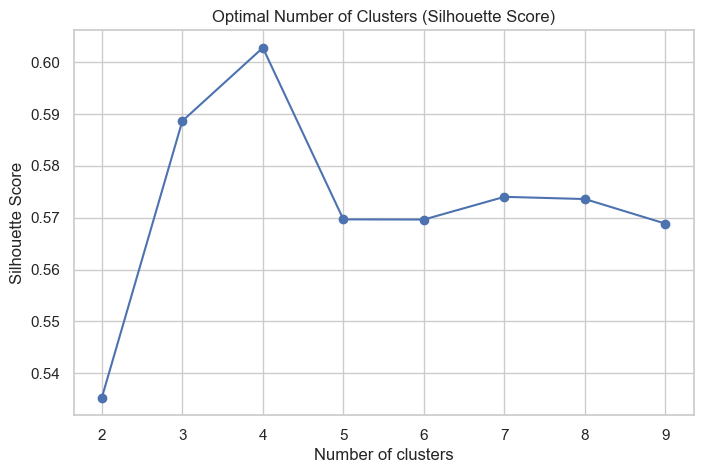

Best number of clusters: 4


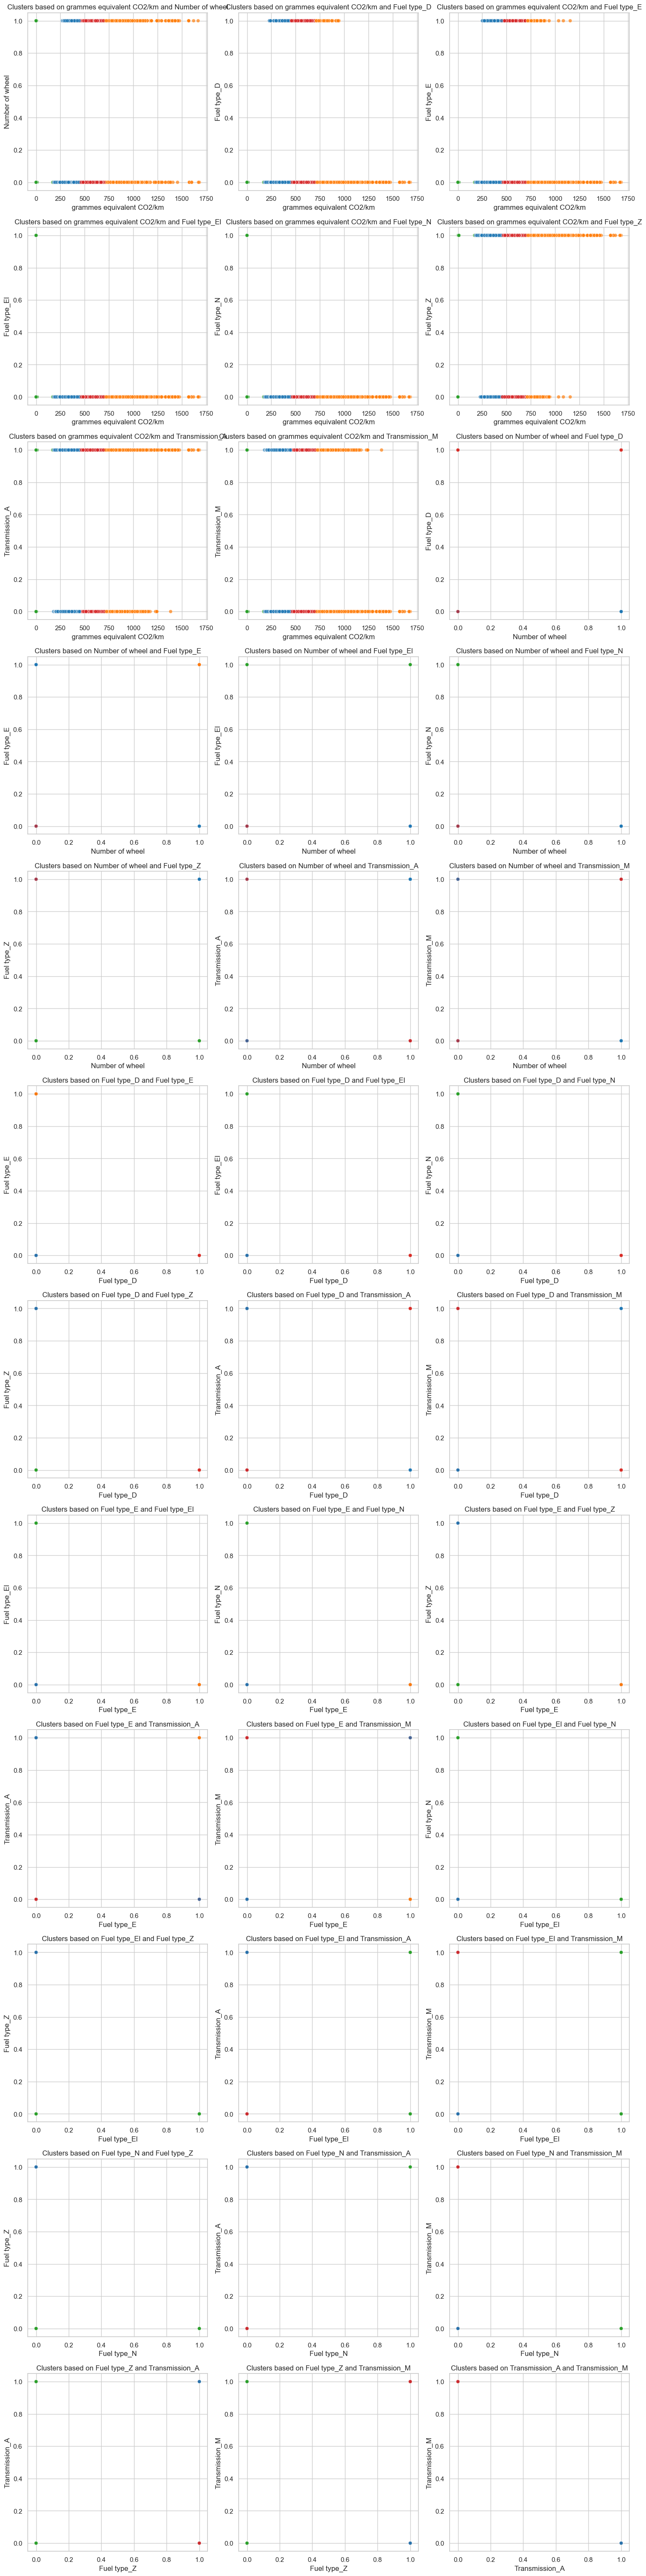

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load or define your DataFrame `df` before running this script.

# Define the features to be used for clustering
features = ['grammes equivalent CO2/km', 'Number of wheel', 'Fuel type_D', 
            'Fuel type_E', 'Fuel type_El', 'Fuel type_N', 'Fuel type_Z', 
            'Transmission_A', 'Transmission_M']

# Find the optimal number of clusters
silhouette_scores = []
inertia = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(df[features])
    silhouette_scores.append(silhouette_score(df[features], kmeans.labels_))
    inertia.append(kmeans.inertia_)

# Plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Optimal Number of Clusters (Silhouette Score)')
plt.show()

# Determine the best number of clusters
best_k = K_range[np.argmax(silhouette_scores)]
print(f'Best number of clusters: {best_k}')

# Perform clustering with the best number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=0, n_init=10).fit(df[features])
df['Cluster'] = kmeans.labels_

# Generate all feature combinations for plotting
feature_combinations = list(itertools.combinations(features, 2))

# Plot clusters using different feature pairs
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=len(feature_combinations)//3 + 1, 
                         ncols=3, 
                         figsize=(15, 5 * (len(feature_combinations)//3 + 1)))

axes = axes.flatten()

for i, (feat1, feat2) in enumerate(feature_combinations):
    sns.scatterplot(data=df, x=feat1, y=feat2, hue='Cluster', palette='tab10', alpha=0.7, ax=axes[i])
    axes[i].set_title(f'Clusters based on {feat1} and {feat2}')
    axes[i].legend_.remove()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
# add the cluster to the dataframe
df['Cluster'] = kmeans.labels_
#onehotnecode the clusters
df = pd.get_dummies(df, columns=['Cluster'], drop_first=True)
df.columns

### A la main

In [33]:
# add a column with one if electric or hydrogen
df['Elec_Hydrogen'] = df['Fuel type_El'] + df['Fuel type_N']
df['Elec_Hydrogen'] = df['Elec_Hydrogen'].apply(lambda x: 1 if x > 0 else 0)
df['Elec_Hydrogen'].value_counts()

Elec_Hydrogen
0    30311
1     2314
Name: count, dtype: int64